In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid

In [3]:
p = Phantom()

In [4]:
Nx = 129
Ny = 100

In [5]:
grid = RegularGrid(RegularAxis.linspace(-1, 1, Nx), RegularAxis.linspace(-1, 1, Ny))

In [6]:
A = p.raster(grid)

<IPython.core.display.Javascript object>


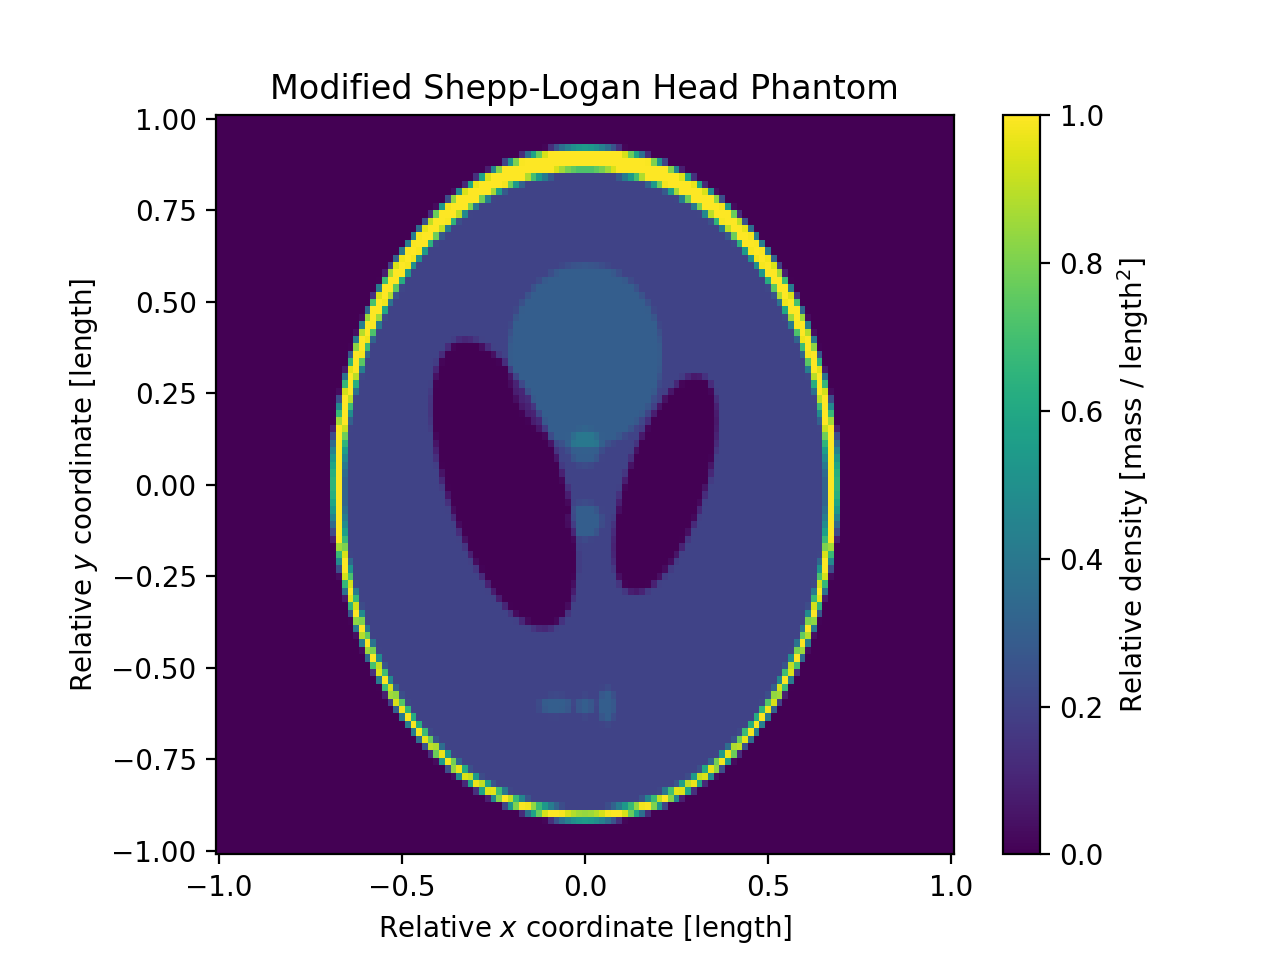

In [7]:
fig, ax = plt.subplots()
im = grid.plot(ax, A)
cb = fig.colorbar(im)
ax.set_xlabel('Relative $x$ coordinate [length]')
ax.set_ylabel('Relative $y$ coordinate [length]')
cb.set_label('Relative density [mass / length$^2$]')
ax.set_title('Modified Shepp-Logan Head Phantom');

In [8]:
na = 80
nt = 40

In [9]:
theta_axis = RegularAxis.linspace(0, 180, na, endpoint=False)
t_axis = RegularAxis.linspace(-1, 1, nt)

sinogram_grid = RegularGrid(theta_axis, t_axis)

In [10]:
T_rect = p.sinogram(sinogram_grid, rect=True, a=1/sinogram_grid.axis_y.T)

<IPython.core.display.Javascript object>


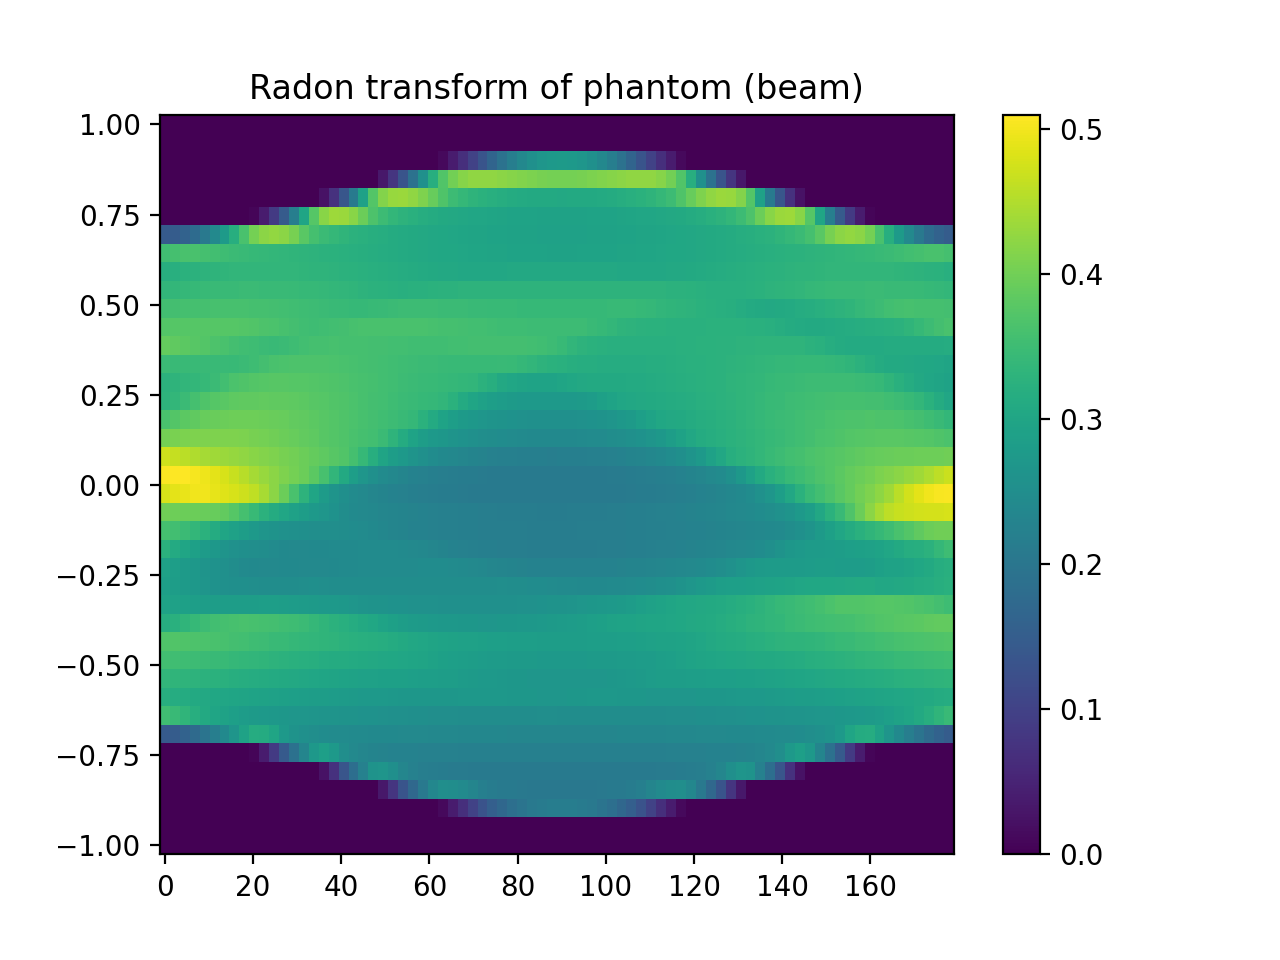

In [11]:
fig, ax = plt.subplots()
im = sinogram_grid.plot(ax, T_rect, aspect='auto')
fig.colorbar(im)
ax.set_title('Radon transform of phantom (beam)');

In [12]:
A_proj = grid.sinogram(sinogram_grid, A)

100%|██████████████████████████████████████████████████████████| 80/80 [00:52<00:00,  1.52it/s]


<IPython.core.display.Javascript object>


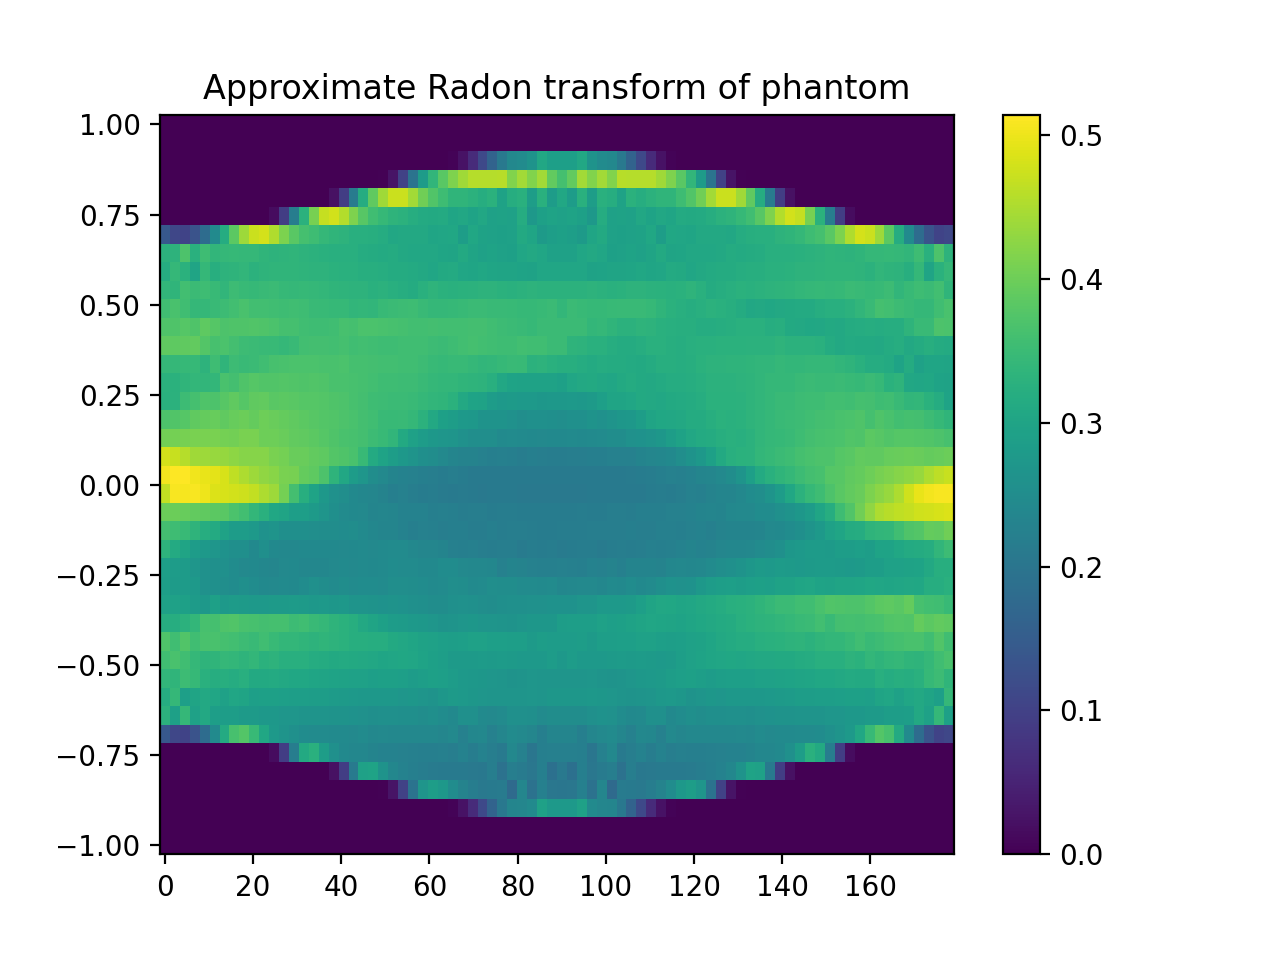

In [13]:
fig, ax = plt.subplots()
im = sinogram_grid.plot(ax, A_proj, aspect='auto')
fig.colorbar(im)
ax.set_title('Approximate Radon transform of phantom');